<a href="https://colab.research.google.com/github/Sahanasd2003/-Employee-Turnover-Prediction/blob/main/Employee_Turnover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install SVM

  Preparing metadata (setup.py) ... done
  Created wheel for SVM: filename=svm-0.1.0-py3-none-any.whl size=3465 sha256=ac4c4d7643f05d75479446d6ca80c684445abc70235e7a396be299091bef728a
  Stored in directory: /root/.cache/pip/wheels/dc/0a/16/c3cfc069f00231db8d16bc70bc747c155395dbd30843a61957
Successfully built SVM


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
sns.set(rc={'axes.facecolor': '#f1faeb'}, style='darkgrid')

In [15]:
df = pd.read_csv('/content/archive (1).zip')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [17]:
continuous_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,object
left,object
promotion_last_5years,object
sales,object
salary,object


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0


In [19]:
df.describe(include='object')

,Work_accident,left,promotion_last_5years,sales,salary
count,14999,14999,14999,14999,14999
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,12830,11428,14680,4140,7316


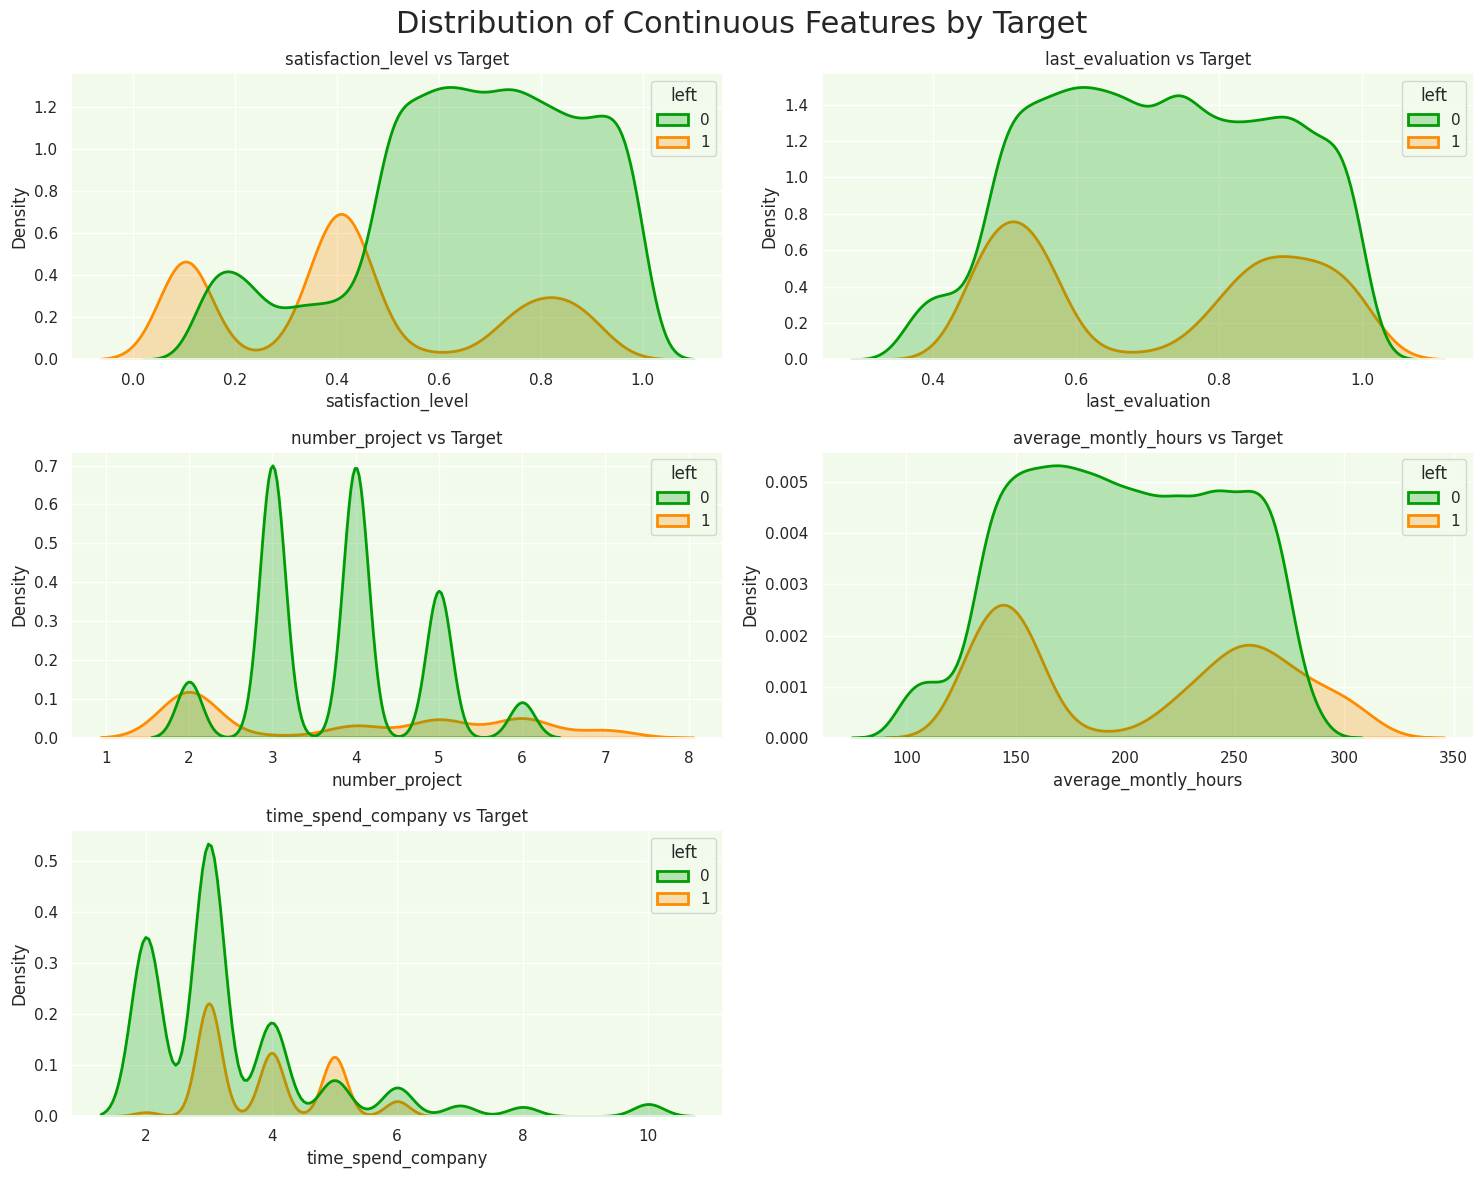

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for ax, col in zip(axes.flatten(), continuous_features):
    sns.kdeplot(data=df, x=col, fill=True, linewidth=2, hue='left', ax=ax, palette = {0: '#009c05', 1: 'darkorange'})
    ax.set_title(f'{col} vs Target')

axes[2,1].axis('off')
plt.suptitle('Distribution of Continuous Features by Target', fontsize=22)
plt.tight_layout()
plt.show()


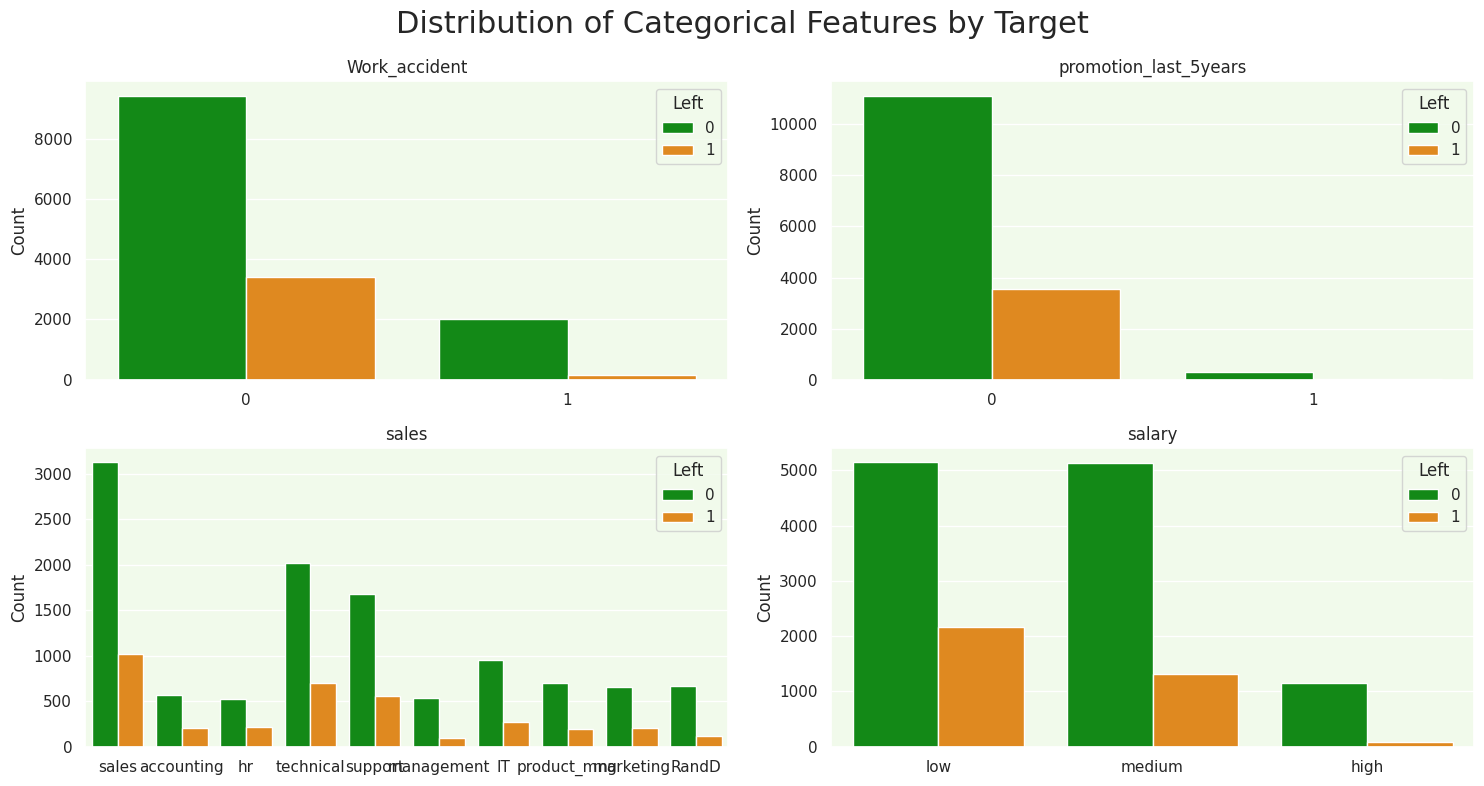

In [21]:
cat_features = ['Work_accident', 'promotion_last_5years', 'sales', 'salary']
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=cat_features[i], hue='left', data=df, ax=ax, palette={0: '#009c05', 1: 'darkorange'})
    ax.set_title(cat_features[i])
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.legend(title='Left', loc='upper right')

plt.suptitle('Distribution of Categorical Features by Target', fontsize=22)
plt.tight_layout()
plt.show()

In [22]:
df = pd.read_csv('/content/archive (1).zip')

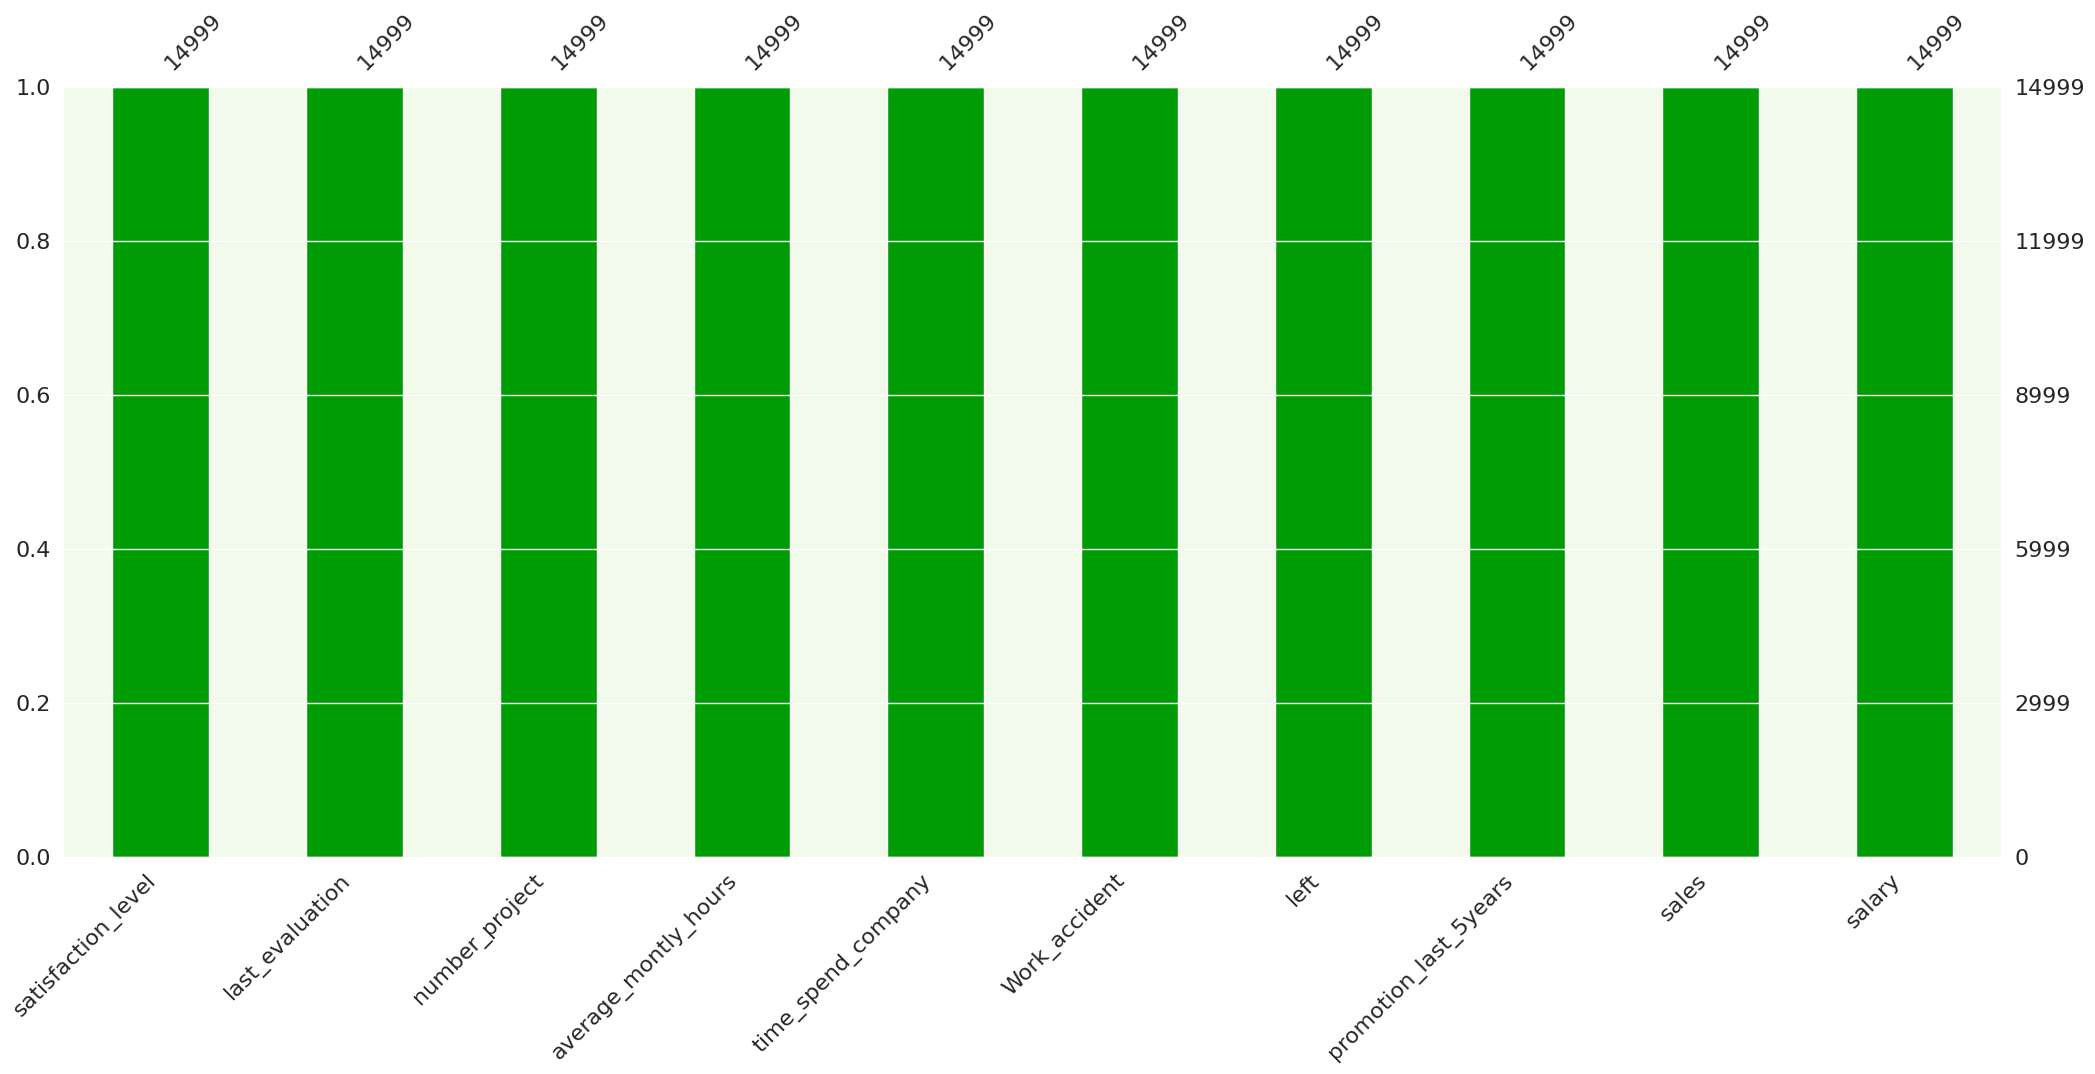

In [23]:
msno.bar(df, color='#009c05')
plt.show()

In [24]:
df_encoded = pd.get_dummies(df, columns=['sales'], drop_first=True)

le = LabelEncoder()
df_encoded['salary'] = le.fit_transform(df_encoded['salary'])

df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,True,False,False


In [25]:
df_encoded.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
salary,int64
sales_RandD,bool


In [26]:
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [28]:
xgb_base = xgb.XGBRegressor(objective ='reg:squarederror')

In [29]:
def tune_regressor_hyperparameters(reg, param_grid, X_train, y_train, scoring='neg_mean_squared_error', n_splits=3):
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    reg_grid = GridSearchCV(reg, param_grid, cv=cv, scoring=scoring, n_jobs=-1)


    reg_grid.fit(X_train, y_train)

    best_hyperparameters = reg_grid.best_params_


    return reg_grid.best_estimator_, best_hyperparameters


In [30]:
xgb_param_grid = {
    'max_depth': [4, 5],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [200, 250, 300],
    'min_child_weight': [2, 3, 4]
}

In [31]:
best_xgb, best_xgb_hyperparameters = tune_regressor_hyperparameters(xgb_base, xgb_param_grid, X_train, y_train)

In [32]:
print('XGBoost Regressor Optimal Hyperparameters: \n', best_xgb_hyperparameters)

XGBoost Regressor Optimal Hyperparameters: 
 {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300}


In [33]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):

    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    # Calculate metrics for testing data
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    # Create a DataFrame for metrics
    metrics_df = pd.DataFrame(data = [mae_test, mse_test, rmse_test, r2_test],
                              index = ['MAE', 'MSE', 'RMSE', 'R2 Score'],
                              columns = [model_name])

    # Print the metrics
    print(f"{model_name} Training Data Metrics:")
    print("MAE: {:.4f}".format(mae_train))
    print("MSE: {:.4f}".format(mse_train))
    print("RMSE: {:.4f}".format(rmse_train))
    print("R2 Score: {:.4f}".format(r2_train))

    print(f"\n{model_name} Testing Data Metrics:")
    print("MAE: {:.4f}".format(mae_test))
    print("MSE: {:.4f}".format(mse_test))
    print("RMSE: {:.4f}".format(rmse_test))
    print("R2 Score: {:.4f}".format(r2_test))

    return metrics_df

In [34]:
xgb_result = evaluate_model(best_xgb, X_train, y_train, X_test, y_test, 'XGBoost')

XGBoost Training Data Metrics:
MAE: 0.0253
MSE: 0.0040
RMSE: 0.0633
R2 Score: 0.9779

XGBoost Testing Data Metrics:
MAE: 0.0436
MSE: 0.0126
RMSE: 0.1123
R2 Score: 0.9305


In [36]:
ctb_param_grid = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}